# Lesly's Reviews Round 3

In [1]:
# Import packages.
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
import msprime

In [2]:
# Intialize the matplolib styling.
plt.rcParams.update({
    'figure.constrained_layout.use': True,
    'figure.facecolor': 'white',
    'font.family': 'sans-serif',
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'ytick.labelsize': 8,
    'xtick.labelsize': 8,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.frameon': False,
})

## FPR

In [3]:
# Define a function to extract all the introgressed information.
def load_all_intro_info():
    # Intialize a dictionary to store the results.
    info_dicc = {
        1: {1: {}},
        100: {0.05: {}, 0.1: {}, 0.25: {}},
    }
    # For every sample size.
    for n in info_dicc:
        # For every threshold.
        for threshold in info_dicc[n]:
            # Intialize arrays to store the results.
            info_dicc[n][threshold]['ts'] = np.array([])
            info_dicc[n][threshold]['ws'] = np.array([])
            info_dicc[n][threshold]['tn'] = np.array([])
            info_dicc[n][threshold]['wn'] = np.array([])
            # For every replicate.
            for rep in range(1, 101):
                # If n = 1 .
                if n == 1:
                    # Load the introgressed tracts.
                    tract_df = pd.read_csv(f'./round3_reviews/tracts/iua_f0.03_n{n}_rep{rep}.csv.gz')
                    # Load the overlap dataframe.
                    overlap_df = pd.read_csv(f'./round3_reviews/overlap/{n}/iua_f0.03_n{n}_rep{rep}.csv.gz')
                    # Update the results.
                    info_dicc[n][threshold]['ts'] = np.append(
                        info_dicc[n][threshold]['ts'],
                        tract_df[tract_df['n_intro'] > 0]['length'].values,
                    )
                    info_dicc[n][threshold]['ws'] = np.append(
                        info_dicc[n][threshold]['ws'],
                        overlap_df[overlap_df['overlap_bp'] > 0]['overlap_bp'].values,
                    )
                    info_dicc[n][threshold]['tn'] = np.append(
                        info_dicc[n][threshold]['tn'],
                        tract_df[tract_df['n_intro'] > 0]['length'].values.size,
                    )
                    info_dicc[n][threshold]['wn'] = np.append(
                        info_dicc[n][threshold]['wn'],
                        overlap_df[overlap_df['overlap_bp'] > 0]['overlap_bp'].values.size,
                    )
                # Else, n = 200 .
                else:
                    # Load the introgressed tracts.
                    tract_df = pd.read_csv(f'./round3_reviews/tracts/iua_f0.03_n{n}_rep{rep}.csv.gz')
                    # Load the overlap dataframe.
                    overlap_df = pd.read_csv(f'./round3_reviews/overlap/{n}/{threshold}/iua_f0.03_n{n}_rep{rep}.csv.gz')
                    # Update the results.
                    info_dicc[n][threshold]['ts'] = np.append(
                        info_dicc[n][threshold]['ts'],
                        tract_df[tract_df['n_intro'] >= (n * 2 * threshold)]['length'].values,
                    )
                    info_dicc[n][threshold]['ws'] = np.append(
                        info_dicc[n][threshold]['ws'],
                        overlap_df[overlap_df['overlap_bp'] > 0]['overlap_bp'].values,
                    )
                    info_dicc[n][threshold]['tn'] = np.append(
                        info_dicc[n][threshold]['tn'],
                        tract_df[tract_df['n_intro'] >= (n * 2 * threshold)]['length'].values.size,
                    )
                    info_dicc[n][threshold]['wn'] = np.append(
                        info_dicc[n][threshold]['wn'],
                        overlap_df[overlap_df['overlap_bp'] > 0]['overlap_bp'].values.size,
                    )
    return info_dicc

In [4]:
# Define a function to extract all the introgressed information.
def load_window_intro_info():
    # Intialize a dictionary to store the results.
    info_dicc = {
        1: {1: {}},
        100: {0.05: {}, 0.1: {}, 0.25: {}},
    }
    # For every sample size.
    for n in info_dicc:
        # For every chromosome threshold.
        for chrom_threshold in info_dicc[n]:
            # For every window threshold.
            for wind_threshold in [0.05, 0.1, 0.25]:
                # Intialize the subdictionary.
                info_dicc[n][chrom_threshold][wind_threshold] = {}
                # Intialize the results.
                info_dicc[n][chrom_threshold][wind_threshold]['n'] = np.array([])
                info_dicc[n][chrom_threshold][wind_threshold]['bp'] = np.array([])
                # For every replicate.
                for rep in range(1, 101):
                    # If n = 1 .
                    if n == 1:
                        # Load the introgressed tracts.
                        tract_df = pd.read_csv(f'./round3_reviews/tracts/iua_f0.03_n{n}_rep{rep}.csv.gz')
                        # Load the overlap dataframe.
                        overlap_df = pd.read_csv(f'./round3_reviews/overlap/{n}/iua_f0.03_n{n}_rep{rep}.csv.gz')
                        # Extract the percent overlap and bases.
                        percent_overlap = overlap_df['overlap_pc'].values
                        bases_overlap = overlap_df['overlap_bp'].values
                        # Determine which windows meet the threshold.
                        good_winds = percent_overlap >= wind_threshold
                        # Update the results.
                        info_dicc[n][chrom_threshold][wind_threshold]['n'] = np.append(
                            info_dicc[n][chrom_threshold][wind_threshold]['n'],
                            good_winds.sum(),
                        )
                        if good_winds.sum() > 0:
                            info_dicc[n][chrom_threshold][wind_threshold]['bp'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['bp'],
                                bases_overlap[good_winds],
                            )
                        else:
                            info_dicc[n][chrom_threshold][wind_threshold]['bp'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['bp'],
                                0,
                            )
                    # Else, n = 200 .
                    else:
                        # Load the introgressed tracts.
                        tract_df = pd.read_csv(f'./round3_reviews/tracts/iua_f0.03_n{n}_rep{rep}.csv.gz')
                        # Load the overlap dataframe.
                        overlap_df = pd.read_csv(f'./round3_reviews/overlap/{n}/{chrom_threshold}/iua_f0.03_n{n}_rep{rep}.csv.gz')
                        # Extract the percent overlap and bases.
                        percent_overlap = overlap_df['overlap_pc'].values
                        bases_overlap = overlap_df['overlap_bp'].values
                        # Determine which windows meet the threshold.
                        good_winds = percent_overlap >= wind_threshold
                        # Update the results.
                        info_dicc[n][chrom_threshold][wind_threshold]['n'] = np.append(
                            info_dicc[n][chrom_threshold][wind_threshold]['n'],
                            good_winds.sum(),
                        )
                        if good_winds.sum() > 0:
                            info_dicc[n][chrom_threshold][wind_threshold]['bp'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['bp'],
                                bases_overlap[good_winds],
                            )
                        else:
                            info_dicc[n][chrom_threshold][wind_threshold]['bp'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['bp'],
                                0,
                            )
    return info_dicc

In [5]:
# Define a function extract the signals of truly inrtogressed windows.
def load_introgressed_signals():
    # Intialize a dictionary to store the results.
    info_dicc = {
        1: {1: {}},
        100: {0.05: {}, 0.1: {}, 0.25: {}},
    }
    # For every sample size.
    for n in info_dicc:
        # For every chromosome threshold.
        for chrom_threshold in info_dicc[n]:
            # For every window threshold.
            for wind_threshold in [0.05, 0.1, 0.25]:
                # Intialize the sub-dictionary.
                info_dicc[n][chrom_threshold][wind_threshold]= {}
                # Intialize arrays to store the results.
                info_dicc[n][chrom_threshold][wind_threshold]['abba'] = np.array([])
                info_dicc[n][chrom_threshold][wind_threshold]['baba'] = np.array([])
                info_dicc[n][chrom_threshold][wind_threshold]['baaa'] = np.array([])
                info_dicc[n][chrom_threshold][wind_threshold]['abaa'] = np.array([])
                info_dicc[n][chrom_threshold][wind_threshold]['D'] = np.array([])
                info_dicc[n][chrom_threshold][wind_threshold]['D+'] = np.array([])
                # For every replicate.
                for rep in range(1, 101):
                    # If n = 1 .
                    if n == 1:
                        # Load the introgressed tracts.
                        tract_df = pd.read_csv(f'./round3_reviews/tracts/iua_f0.03_n{n}_rep{rep}.csv.gz')
                        # Load the overlap dataframe.
                        overlap_df = pd.read_csv(f'./round3_reviews/overlap/{n}/iua_f0.03_n{n}_rep{rep}.csv.gz')
                        # Extract the percent overlap.
                        percent_overlap = overlap_df['overlap_pc'].values
                        # Determine which windows meet the threshold.
                        good_winds = percent_overlap >= wind_threshold
                        # Update the results.
                        if good_winds.sum() > 0:
                            info_dicc[n][chrom_threshold][wind_threshold]['abba'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['abba'],
                                overlap_df['abba'].values[good_winds],
                            )
                            info_dicc[n][chrom_threshold][wind_threshold]['baba'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['baba'],
                                overlap_df['baba'].values[good_winds],
                            )
                            info_dicc[n][chrom_threshold][wind_threshold]['baaa'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['baaa'],
                                overlap_df['baaa'].values[good_winds],
                            )
                            info_dicc[n][chrom_threshold][wind_threshold]['abaa'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['abaa'],
                                overlap_df['abaa'].values[good_winds],
                            )
                            info_dicc[n][chrom_threshold][wind_threshold]['D'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['D'],
                                overlap_df['D'].values[good_winds],
                            )
                            info_dicc[n][chrom_threshold][wind_threshold]['D+'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['D+'],
                                overlap_df['D+'].values[good_winds],
                            )
                    # Else, n = 200 .
                    else:
                        # Load the introgressed tracts.
                        tract_df = pd.read_csv(f'./round3_reviews/tracts/iua_f0.03_n{n}_rep{rep}.csv.gz')
                        # Load the overlap dataframe.
                        overlap_df = pd.read_csv(f'./round3_reviews/overlap/{n}/{chrom_threshold}/iua_f0.03_n{n}_rep{rep}.csv.gz')
                        # Extract the percent overlap.
                        percent_overlap = overlap_df['overlap_pc'].values
                        # Determine which windows meet the threshold.
                        good_winds = percent_overlap >= wind_threshold
                        # Update the results.
                        if good_winds.sum() > 0:
                            info_dicc[n][chrom_threshold][wind_threshold]['abba'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['abba'],
                                overlap_df['abba'].values[good_winds],
                            )
                            info_dicc[n][chrom_threshold][wind_threshold]['baba'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['baba'],
                                overlap_df['baba'].values[good_winds],
                            )
                            info_dicc[n][chrom_threshold][wind_threshold]['baaa'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['baaa'],
                                overlap_df['baaa'].values[good_winds],
                            )
                            info_dicc[n][chrom_threshold][wind_threshold]['abaa'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['abaa'],
                                overlap_df['abaa'].values[good_winds],
                            )
                            info_dicc[n][chrom_threshold][wind_threshold]['D'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['D'],
                                overlap_df['D'].values[good_winds],
                            )
                            info_dicc[n][chrom_threshold][wind_threshold]['D+'] = np.append(
                                info_dicc[n][chrom_threshold][wind_threshold]['D+'],
                                overlap_df['D+'].values[good_winds],
                            )
    return info_dicc

In [6]:
# Load all the introgressed information.
all_intro_info = load_all_intro_info()

In [7]:
# Load the window introgressed information.
wind_intro_info = load_window_intro_info()

In [8]:
# Load the signals of truly introgressed windows.
intro_signal_info = load_introgressed_signals()

In [9]:
# Define a function to load the null distributions.
def load_null_windows():
    # Intialize a dictionary to store the results.
    null_dicc = {
        1: {'D': np.array([]), 'D+': np.array([])},
        100: {'D': np.array([]), 'D+': np.array([])},
    }
    # For every sample size.
    for n in null_dicc:
        # For every replicate.
        for rep in range(1, 101):
            # Load the window data.
            winds = pd.read_csv(f'./round3_reviews/null/iua_f0.0_n{n}_rep{rep}.csv.gz')
            # Update the dictionaries.
            null_dicc[n]['D'] = np.append(null_dicc[n]['D'], winds['D'].values)
            null_dicc[n]['D+'] = np.append(null_dicc[n]['D+'], winds['D+'].values)
    return null_dicc

In [10]:
# Define a function to compute critical values and fpr.
def calc_cv_fpr(null_dicc, pvals):
    # Intialize a dataframe dictionary.
    df_dicc = {
        'n': [], 'pval': [],
        'd_cv_upr': [], 'd_cv_lwr': [], 'd_fpr': [],
        'dplus_cv_upr': [], 'dplus_cv_lwr': [], 'dplus_fpr': [], 
         
    }
    # For every sample size.
    for n in null_dicc:
        # Remove undefinded values.
        clean_d = null_dicc[n]['D'][~np.isnan(null_dicc[n]['D'])]
        clean_dplus = null_dicc[n]['D+'][~np.isnan(null_dicc[n]['D+'])]
        # For every p-value.
        for pval in pvals:
            # Compute the upper and lower bounds of the critical intervals.
            d_cv_upr = np.quantile(clean_d, 1 - (round(pval, 2) / 2))
            d_cv_lwr = np.quantile(clean_d, (round(pval, 2) / 2))
            dplus_cv_upr = np.quantile(clean_dplus, 1 - (round(pval, 2) / 2))
            dplus_cv_lwr = np.quantile(clean_dplus, (round(pval, 2) / 2))
            # Compute the false positive rate for the given p-value.
            d_fpr = np.mean((clean_d >= d_cv_upr) | (clean_d <= d_cv_lwr))
            dplus_fpr = np.mean((clean_dplus >= dplus_cv_upr) | (clean_dplus <= dplus_cv_lwr))
            # Update the dictionary.
            df_dicc['n'].append(n)
            df_dicc['pval'].append(pval)
            df_dicc['d_cv_upr'].append(d_cv_upr)
            df_dicc['d_cv_lwr'].append(d_cv_lwr)
            df_dicc['d_fpr'].append(d_fpr)
            df_dicc['dplus_cv_upr'].append(dplus_cv_upr)
            df_dicc['dplus_cv_lwr'].append(dplus_cv_lwr)
            df_dicc['dplus_fpr'].append(dplus_fpr)
    return pd.DataFrame(data=df_dicc)

In [11]:
# Load the null distributions.
null_dists = load_null_windows()

In [12]:
# Determine the significance thresholds.
alphas = np.arange(0.01, 1.01, 0.01)
# Build the null distribution results.
null_df = calc_cv_fpr(null_dists, alphas)

### Null Distributions and FPR

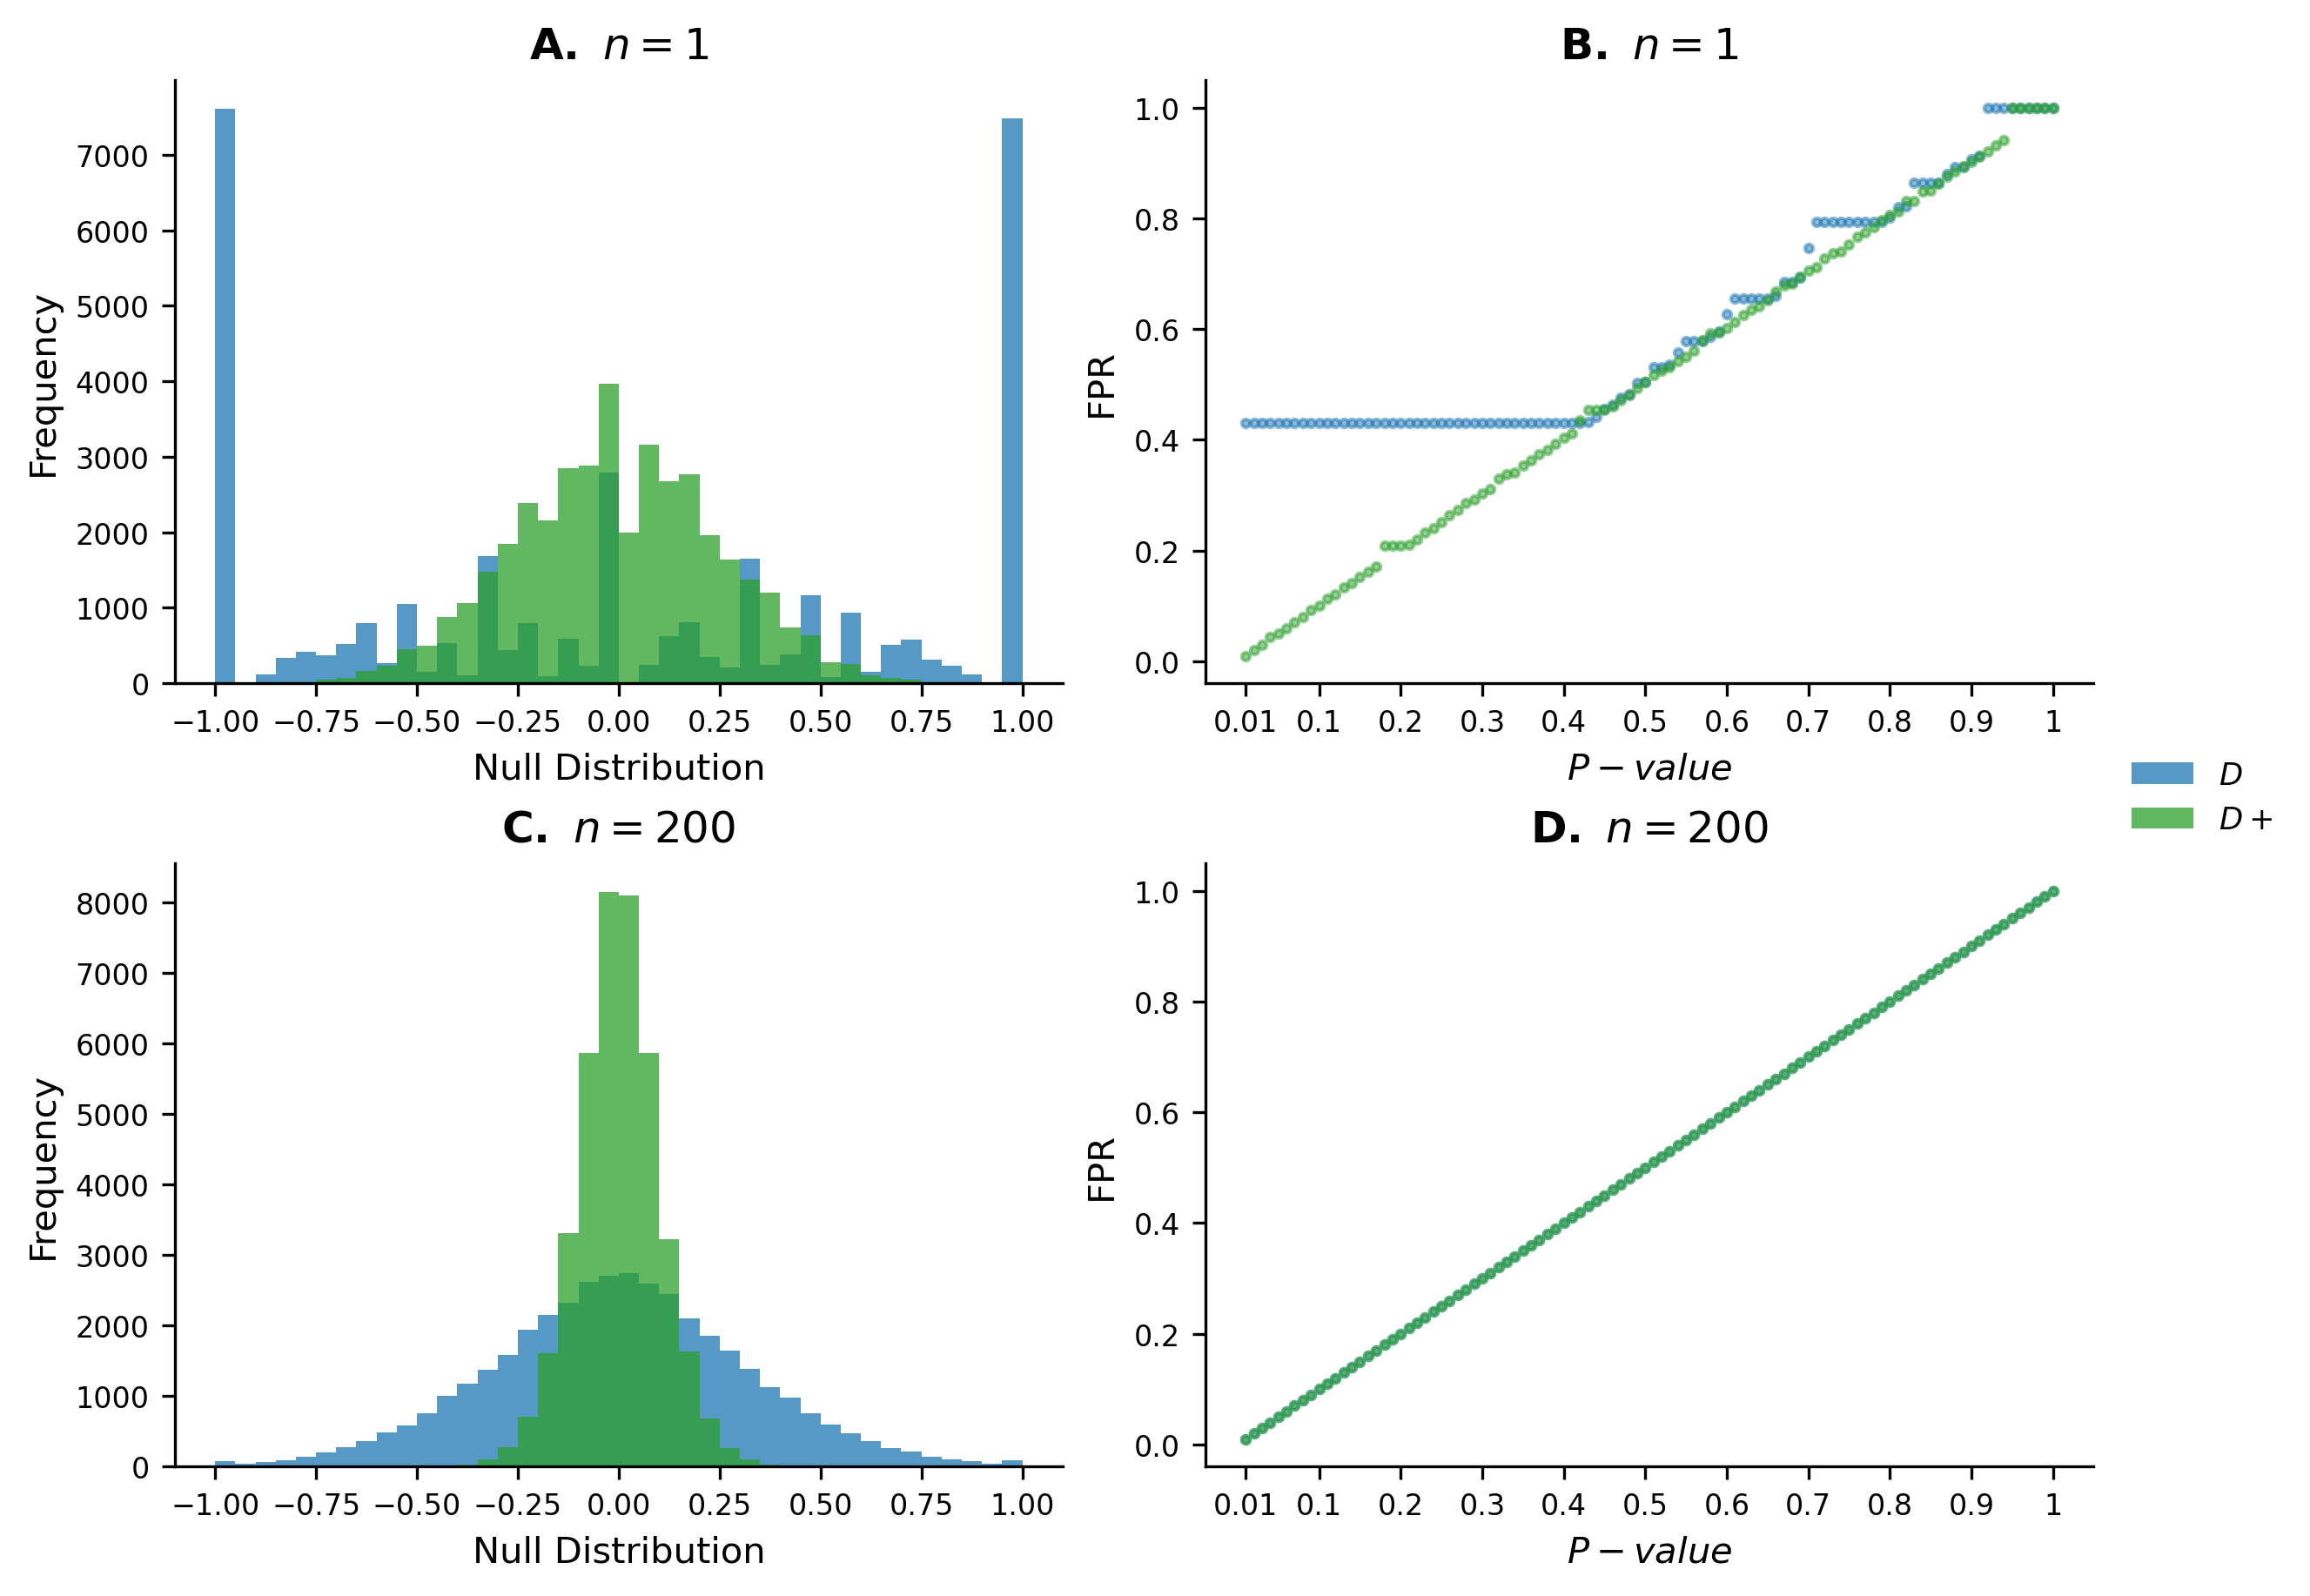

In [13]:
# Intialize the figure.
fig, axes = plt.subplots(
    2, 2, figsize=(8, 6), dpi=300.0,
    sharex=False, sharey=False, facecolor='white',
)
# Intialize the x-axis values for the FPR results.
x_fpr = np.array([
    0.01, 0.1 , 0.2 , 0.3 ,
    0.4 , 0.5 , 0.6 , 0.7 ,
    0.8 , 0.9 , 1,
])
# Intialize the first letter ASCII value.
c_letter = 65
# For every sample size.
for i, n in enumerate([1, 100]):
    # Plot the distributions.
    axes[i, 0].hist(
        null_dists[n]['D'], np.arange(-1, 1.05, 0.05),
        histtype='stepfilled', color='tab:blue', alpha=0.75,
    )
    axes[i, 0].hist(
        null_dists[n]['D+'], np.arange(-1, 1.05, 0.05),
        histtype='stepfilled', color='tab:green', alpha=0.75,
    )
    # Plot the FPR.
    axes[i, 1].scatter(
        alphas, null_df[null_df['n'] == n]['d_fpr'].values,
        marker='o', s=5, color='tab:blue', alpha=0.5,
    )
    axes[i, 1].scatter(
        alphas, null_df[null_df['n'] == n]['dplus_fpr'].values,
        marker='o', s=5, color='tab:green', alpha=0.5,
    )
    # Set the x-axis ticks and tick labels for the FPR results.
    axes[i, 1].set_xticks(x_fpr)
    axes[i, 1].set_xticklabels([str(int(x)) if x.is_integer() else str(x) for x in x_fpr])
    # Set the axes labels for each subplot.
    axes[i, 0].set_xlabel('Null Distribution')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 1].set_xlabel(r'$P-value$')
    axes[i, 1].set_ylabel('FPR')
    if n == 1:
        # Update the title.
        axes[i, 0].set_title(r'$\bf{'+chr(c_letter)+'.}$ '+r'$n = $'+f'{n}')
        axes[i, 1].set_title(r'$\bf{'+chr(c_letter+1)+'.}$ '+r'$n = $'+f'{n}')
        # Move the letter counter forward.
        c_letter += 2
    else:
        # Update the title.
        axes[i, 0].set_title(r'$\bf{'+chr(c_letter)+'.}$ '+r'$n = $'+f'{n * 2}')
        axes[i, 1].set_title(r'$\bf{'+chr(c_letter+1)+'.}$ '+r'$n = $'+f'{n * 2}')
# Configure the legend.
legend_elements = [
    Patch(facecolor='tab:blue', alpha=0.75, label=r'$D$'),
    Patch(facecolor='tab:green', alpha=0.75, label=r'$D+$'),
]
# Add a figure lgend.
fig.legend(
    handles=legend_elements, loc='center left',
    bbox_to_anchor=(1.0, 0.5), frameon=False,
    fontsize=8.5,
)
# Show the plot.
plt.show()

## Performance

In [14]:
# Define a function to load and compute the performance results.
def load_performances(pvals):
    # Intialize a dictionary to store the results.
    performance_dicc = {
        1: {1: {}},
        100: {0.05: {}, 0.1: {}, 0.25: {}},
    }
    # For every sample size.
    for n in performance_dicc:
        # For every chromosome threshold.
        for chrom_threshold in performance_dicc[n]:
            # For every test statistic.
            for stat in ['D', 'D+']:
                # For every p-value.
                for pval in pvals:
                    # For every window threshold.
                    for wind_threshold in [0.05, 0.1, 0.25]:
                        # Intialize the column key.
                        col_key = f'{stat}-{round(pval, 2)}-{wind_threshold}'
                        # Intialize the sub-dictionary.
                        performance_dicc[n][chrom_threshold][col_key]= {}
                        # Intialize the performance counters.
                        performance_dicc[n][chrom_threshold][col_key]['TP'] = 0
                        performance_dicc[n][chrom_threshold][col_key]['TN'] = 0
                        performance_dicc[n][chrom_threshold][col_key]['FP'] = 0
                        performance_dicc[n][chrom_threshold][col_key]['FN'] = 0
    # For every sample size.
    for n in performance_dicc:
        # For every chromosome threshold.
        for chrom_threshold in performance_dicc[n]:
            # For every replicate.
                for rep in range(1, 101):
                    # If n = 1 .
                    if n == 1:
                        # Load the performance results.
                        performance_df = pd.read_csv(
                            f'./round3_reviews/performance/{n}/iua_f0.03_n{n}_rep{rep}.csv.gz',
                        )
                        # For every column key.
                        for col_key in performance_dicc[n][chrom_threshold]:
                            # For every performance outcome.
                            for outcome in performance_dicc[n][chrom_threshold][col_key]:
                                # Update the reults.
                                performance_dicc[n][chrom_threshold][col_key][outcome] += (performance_df[col_key].values == outcome).sum()
                    # Else, n = 200 .
                    else:
                        # Load the performance results.
                        performance_df = pd.read_csv(
                            f'./round3_reviews/performance/{n}/{chrom_threshold}/iua_f0.03_n{n}_rep{rep}.csv.gz',
                        )
                        # For every column key.
                        for col_key in performance_dicc[n][chrom_threshold]:
                            # For every performance outcome.
                            for outcome in performance_dicc[n][chrom_threshold][col_key]:
                                # Update the reults.
                                performance_dicc[n][chrom_threshold][col_key][outcome] += (performance_df[col_key].values == outcome).sum()
    return performance_dicc

In [15]:
# Define a function to compute the performance metrics.
def calc_performance_metrics(performance_dicc):
    # Intialize a dataframe dictionary.
    df_dicc = {
        'n': [], 'chrom_thresh': [], 'wind_thresh': [], 'pval': [], 'stat': [],
        'tp': [], 'tn': [], 'fp': [], 'fn': [],
        'precision': [], 'recall': [],
    }
    # For every sample size.
    for n in performance_dicc:
        # For every chromosome threshold.
        for chrom_threshold in performance_dicc[n]:
            # For every column key.
            for col_key in performance_dicc[n][chrom_threshold]:
                # Unpack the column key.
                stat, pval, wind_threshold = col_key.split('-')
                # Extract the performance outcomes.
                tp = performance_dicc[n][chrom_threshold][col_key]['TP']
                tn = performance_dicc[n][chrom_threshold][col_key]['TN']
                fp = performance_dicc[n][chrom_threshold][col_key]['FP']
                fn = performance_dicc[n][chrom_threshold][col_key]['FN']
                # Compute precision.
                precision = tp / (tp + fp)
                # Compute recall.
                recall = tp / (tp + fn)
                # Update the dictionary.
                df_dicc['n'].append(n)
                df_dicc['chrom_thresh'].append(chrom_threshold)
                df_dicc['wind_thresh'].append(float(wind_threshold))
                df_dicc['pval'].append(float(pval))
                df_dicc['stat'].append(stat)
                df_dicc['tp'].append(tp)
                df_dicc['tn'].append(tn)
                df_dicc['fp'].append(fp)
                df_dicc['fn'].append(fn)
                df_dicc['precision'].append(precision)
                df_dicc['recall'].append(recall)
    return pd.DataFrame(data=df_dicc)

In [16]:
# Define a function for plotting the perfromance.
def plot_performance(data, metric, ylab):
    # Intialize the figure.
    fig, axes = plt.subplots(
        4, 3, figsize=(12, 10), dpi=300.0,
        sharex=False, sharey=False, facecolor='white',
    )
    # Intialize the x-axis values.
    xs = np.arange(0.01, 1.01, 0.01)
    x_ticks = np.array([
        0.01, 0.1 , 0.2 , 0.3 ,
        0.4 , 0.5 , 0.6 , 0.7 ,
        0.8 , 0.9 , 1,
    ])
    # Intialize a plotting dictionary.
    plot_dicc = {
        (1, 1): r'$n = 1$',
        (100, 0.05): r'$n = 200$; Chrom. Thresh.$\geq 5\%$',
        (100, 0.1): r'$n = 200$; Chrom. Thresh.$\geq 10\%$',
        (100, 0.25): r'$n = 200$; Chrom. Thresh.$\geq 25\%$',
    }
    # Intialize a window threshold suffix list.
    n1_suffix_list = [
        r'; Wind. Thresh. $\geq 5\%$',
        r'; Wind. Thresh. $\geq 10\%$',
        r'; Wind. Thresh. $\geq 25\%$',
    ]
    n100_suffix_list = [
        '\n'+r'Wind. Thresh. $\geq 5\%$',
        '\n'+r'Wind. Thresh. $\geq 10\%$',
        '\n'+r'Wind. Thresh. $\geq 25\%$',
    ]
    # Intialize the first letter ASCII value.
    c_letter = 65
    # For every set of values.
    for i, vals in enumerate(plot_dicc):
        # Extract the values.
        n, chrom_thresh = vals
        # Intialzie the sample size and chromosome threshold conditions.
        cond_n = data['n'] == n
        cond_chrom = data['chrom_thresh'] == chrom_thresh
        # For every window threshold.
        for j, wind_thresh in enumerate([0.05, 0.1, 0.25]):
            # Intialize the window threshold and test statistic conditions.
            cond_wind = data['wind_thresh'] == wind_thresh
            cond_d = data['stat'] == 'D'
            cond_dplus = data['stat'] == 'D+'
            # Plot the metric results.
            axes[i, j].scatter(
                xs, data[cond_n & cond_chrom & cond_wind & cond_d][metric].values,
                marker='o', s=5, color='tab:blue', alpha=0.5,
            )
            axes[i, j].scatter(
                xs, data[cond_n & cond_chrom & cond_wind & cond_dplus][metric].values,
                marker='o', s=5, color='tab:green', alpha=0.5,
            )
            # Set the x-axis ticks and tick labels.
            axes[i, j].set_xticks(x_ticks)
            axes[i, j].set_xticklabels([str(int(x)) if x.is_integer() else str(x) for x in x_ticks])
            # Set the axes labels for each subplot.
            axes[i, j].set_ylabel(ylab)
            axes[i, j].set_xlabel(r'$P-value$')
            # If n = 1 .
            if n == 1:
                # Set the title of the subplot.
                axes[i, j].set_title(r'$\bf{'+chr(c_letter)+'.}$ '+plot_dicc[vals]+n1_suffix_list[j])
                # Move the letter counter forward.
                c_letter += 1
            # Else n = 200 .
            else:
                # Set the title of the subplot.
                axes[i, j].set_title(r'$\bf{'+chr(c_letter)+'.}$ '+plot_dicc[vals]+n100_suffix_list[j])
                # Move the letter counter forward.
                c_letter += 1
    # Configure the legend.
    legend_elements = [
        Patch(facecolor='tab:blue', alpha=0.75, label=r'$D$'),
        Patch(facecolor='tab:green', alpha=0.75, label=r'$D+$'),
    ]
    # Add a figure lgend.
    fig.legend(
        handles=legend_elements, loc='center left',
        bbox_to_anchor=(1.0, 0.5), frameon=False,
        fontsize=8.5,
    )
    # Show the plot.
    plt.show()
    return

In [17]:
# Load the performance results.
performance_results = load_performances(alphas)

In [18]:
# Summarize the performance results.
performance_df = calc_performance_metrics(performance_results)

## Signals in Introgressed Windows Conditioned on Performance Scenarios

In [19]:
# Define a function to extract the introgressed information for different performance scenarios.
def load_performance_scenarios(pval=0.05):
    # Intialize a dictionary to store the results.
    performance_dicc = {
        1: {1: {}},
        100: {0.05: {}, 0.1: {}, 0.25: {}},
    }
    # For every sample size.
    for n in performance_dicc:
        # For every chromosome threshold.
        for chrom_threshold in performance_dicc[n]:
            # For every window threshold.
            for wind_threshold in [0.05, 0.1, 0.25]:
                # Intialize the sub-dictionary.
                performance_dicc[n][chrom_threshold][wind_threshold] = {}
                # For every scenario.
                for scenario in ['D', 'D+', 'both', 'none']:
                    # Intialize the sub-dictionary.
                    performance_dicc[n][chrom_threshold][wind_threshold][scenario] = {}
                    # Intialize arrays to store the results.
                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['n'] = np.array([])
                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['abba'] = np.array([])
                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['baba'] = np.array([])
                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['baaa'] = np.array([])
                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['abaa'] = np.array([])
                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['D'] = np.array([])
                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['D+'] = np.array([])
    # For every sample size.
    for n in performance_dicc:
        # For every chromosome threshold.
        for chrom_threshold in performance_dicc[n]:
            # For every replicate.
                for rep in range(1, 101):
                    # If n = 1 .
                    if n == 1:
                        # Load the performance results.
                        performance_df = pd.read_csv(
                            f'./round3_reviews/performance/{n}/iua_f0.03_n{n}_rep{rep}.csv.gz',
                        )
                        # For every window threshold.
                        for wind_threshold in [0.05, 0.1, 0.25]:
                            # Extract the percent overlap.
                            percent_overlap = performance_df['overlap_pc'].values
                            # Determine which windows meet the threshold.
                            good_winds = percent_overlap >= wind_threshold
                            # Construct the columns keys.
                            d_col = f'D-{round(pval, 2)}-{wind_threshold}'
                            dplus_col = f'D+-{round(pval, 2)}-{wind_threshold}'
                            # Extract the results.
                            d_results = performance_df[d_col].values
                            dplus_results = performance_df[dplus_col].values
                            # Determine the indicies for each scenario.
                            only_d = np.where((good_winds == True) & (d_results == 'TP') & (dplus_results != 'TP'))[0]
                            only_dplus = np.where((good_winds == True) & (d_results != 'TP') & (dplus_results == 'TP'))[0]
                            both = np.where((good_winds == True) & (d_results == 'TP') & (dplus_results == 'TP'))[0]
                            neither = np.where((good_winds == True) & (d_results != 'TP') & (dplus_results != 'TP'))[0]
                            idx_list = [only_d, only_dplus, both, neither]
                            # For every sceanario.
                            for i, scenario in enumerate(['D', 'D+', 'both', 'none']):
                                # Update the results for each scenario.
                                if idx_list[i].size > 0:
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['n'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['n'],
                                        idx_list[i].size,
                                    )
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['abba'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['abba'],
                                        performance_df['abba'].values[idx_list[i]],
                                    )
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['baba'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['baba'],
                                        performance_df['baba'].values[idx_list[i]],
                                    )
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['baaa'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['baaa'],
                                        performance_df['baaa'].values[idx_list[i]],
                                    )
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['abaa'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['abaa'],
                                        performance_df['abaa'].values[idx_list[i]],
                                    )
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['D'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['D'],
                                        performance_df['D'].values[idx_list[i]],
                                    )
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['D+'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['D+'],
                                        performance_df['D+'].values[idx_list[i]],
                                    )
                    # Else, n = 200 .
                    else:
                        # Load the performance results.
                        performance_df = pd.read_csv(
                            f'./round3_reviews/performance/{n}/{chrom_threshold}/iua_f0.03_n{n}_rep{rep}.csv.gz',
                        )
                        # For every window threshold.
                        for wind_threshold in [0.05, 0.1, 0.25]:
                            # Extract the percent overlap.
                            percent_overlap = performance_df['overlap_pc'].values
                            # Determine which windows meet the threshold.
                            good_winds = percent_overlap >= wind_threshold
                            # Construct the columns keys.
                            d_col = f'D-{round(pval, 2)}-{wind_threshold}'
                            dplus_col = f'D+-{round(pval, 2)}-{wind_threshold}'
                            # Extract the results.
                            d_results = performance_df[d_col].values
                            dplus_results = performance_df[dplus_col].values
                            # Determine the indicies for each scenario.
                            only_d = np.where((good_winds == True) & (d_results == 'TP') & (dplus_results != 'TP'))[0]
                            only_dplus = np.where((good_winds == True) & (d_results != 'TP') & (dplus_results == 'TP'))[0]
                            both = np.where((good_winds == True) & (d_results == 'TP') & (dplus_results == 'TP'))[0]
                            neither = np.where((good_winds == True) & (d_results != 'TP') & (dplus_results != 'TP'))[0]
                            idx_list = [only_d, only_dplus, both, neither]
                            # For every sceanario.
                            for i, scenario in enumerate(['D', 'D+', 'both', 'none']):
                                # Update the results for each scenario.
                                if idx_list[i].size > 0:
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['n'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['n'],
                                        idx_list[i].size,
                                    )
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['abba'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['abba'],
                                        performance_df['abba'].values[idx_list[i]],
                                    )
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['baba'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['baba'],
                                        performance_df['baba'].values[idx_list[i]],
                                    )
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['baaa'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['baaa'],
                                        performance_df['baaa'].values[idx_list[i]],
                                    )
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['abaa'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['abaa'],
                                        performance_df['abaa'].values[idx_list[i]],
                                    )
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['D'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['D'],
                                        performance_df['D'].values[idx_list[i]],
                                    )
                                    performance_dicc[n][chrom_threshold][wind_threshold][scenario]['D+'] = np.append(
                                        performance_dicc[n][chrom_threshold][wind_threshold][scenario]['D+'],
                                        performance_df['D+'].values[idx_list[i]],
                                    )
    return performance_dicc

In [20]:
# Define a function to summarize the performance scenarios.
def performance_scenarios_summary(performance_dicc, pval=0.05):
    # Intialize a dataframe dictionary.
    df_dicc = {
        'n': [], 'chrom_thresh': [], 'wind_thresh': [], 'pval': [], 'scenario': [],
        'count': [], 'mean_abba': [], 'mean_baba': [], 'mean_baaa': [], 'mean_abaa': [], 'mean_D': [], 'mean_D+': [],
    }
    # Intialize a scenario dictionary.
    scenario_dicc = {
        'D': 'only_D',
        'D+': 'only_D+',
        'both': 'both_sig',
        'none': 'neither_sig',
    }
    # For every sample size.
    for n in performance_dicc:
        # For every chromosome threshold.
        for chrom_threshold in performance_dicc[n]:
            # For every window threshold.
            for wind_threshold in performance_dicc[n][chrom_threshold]:
                # For every scenario.
                for scenario in performance_dicc[n][chrom_threshold][wind_threshold]:
                    # Update the dictionary.
                    df_dicc['n'].append(n)
                    df_dicc['chrom_thresh'].append(chrom_threshold)
                    df_dicc['wind_thresh'].append(wind_threshold)
                    df_dicc['pval'].append(pval)
                    df_dicc['scenario'].append(scenario_dicc[scenario])
                    df_dicc['count'].append(np.nansum(performance_dicc[n][chrom_threshold][wind_threshold][scenario]['n']))
                    df_dicc['mean_abba'].append(np.nanmean(performance_dicc[n][chrom_threshold][wind_threshold][scenario]['abba']))
                    df_dicc['mean_baba'].append(np.nanmean(performance_dicc[n][chrom_threshold][wind_threshold][scenario]['baba']))
                    df_dicc['mean_baaa'].append(np.nanmean(performance_dicc[n][chrom_threshold][wind_threshold][scenario]['baaa']))
                    df_dicc['mean_abaa'].append(np.nanmean(performance_dicc[n][chrom_threshold][wind_threshold][scenario]['abaa']))
                    df_dicc['mean_D'].append(np.nanmean(performance_dicc[n][chrom_threshold][wind_threshold][scenario]['D']))
                    df_dicc['mean_D+'].append(np.nanmean(performance_dicc[n][chrom_threshold][wind_threshold][scenario]['D+']))
    return pd.DataFrame(data=df_dicc)

In [21]:
# Load the performance sceanrios.
performance_scenarios = load_performance_scenarios()

In [22]:
# Load the scenario performance summary.
scenarios_summary = performance_scenarios_summary(performance_scenarios)

In [23]:
scenarios_summary

,n,chrom_thresh,wind_thresh,pval,scenario,count,mean_abba,mean_baba,mean_baaa,mean_abaa,mean_D,mean_D+
0,1,1.00,0.05,0.05,only_D,316.0,6.360759,0.000000,17.509494,13.411392,1.000000,0.265333
1,1,1.00,0.05,0.05,only_D+,155.0,15.741935,1.812903,27.574194,9.438710,0.782257,0.587630
2,1,1.00,0.05,0.05,both_sig,339.0,16.587021,0.000000,25.200590,7.265487,1.000000,0.693527
3,1,1.00,0.05,0.05,neither_sig,1321.0,6.925057,4.066616,20.132475,17.422407,0.170826,0.103478
4,1,1.00,0.10,0.05,only_D,291.0,6.563574,0.000000,17.749141,13.378007,1.000000,0.276374
5,1,1.00,0.10,0.05,only_D+,154.0,15.720779,1.818182,27.551948,9.441558,0.781492,0.587117
6,1,1.00,0.10,0.05,both_sig,338.0,16.597633,0.000000,25.218935,7.266272,1.000000,0.693682
7,1,1.00,0.10,0.05,neither_sig,1244.0,7.168810,4.090836,20.360932,17.418006,0.189374,0.112941
8,1,1.00,0.25,0.05,only_D,220.0,7.140909,0.000000,18.340909,13.722727,1.000000,0.288216
9,1,1.00,0.25,0.05,only_D+,146.0,16.075342,1.849315,27.753425,9.506849,0.784560,0.588181


## Responses to Reviewer 1

> 1. In the response to 4a and 4b, the authors chose a threshold to determine an introgressed window. The choice of this threshold is somewhat subjective and will affect the recall for the D and D+ statistics. I wonder whether D+ statistic is still better than D in simulations when this threshold changed.

The reviewer highlights an important point. One has to make “somewhat subjective” decisions about the amount of overlap between an introgressed tract and a non-overlapping window in any simulation study investigating the behavior of window-based summary statistics of introgression. To address the reviewer's concerns about the performance of D and D+, we re-ran simulations using the demographic model described in Figure 2, sampling a single chromosome from each lineage, and re-computing our performance metrics—i.e., precision and recall—using two additional windows thresholds of 5% and 25%.

The figure below shows the precision (top row) and recall (bottom row)  results using a window threshold of 5% (panels A and D), the original window threshold of 10% shown in Figure 5 of the main text (panels B and E), and a window threshold of 25% (panels C and F). Panels A-F demonstrate that changing the window threshold will have a very minimal impact on our original results. In general, as the window threshold increases, the number of windows being classified as introgressed will decrease. Consequently, precision will decrease, and recall will increase for both D and D+, as fewer windows identified as introgressed result in fewer possible true positives. Nonetheless, the relationships between precision and recall for D and D+ are the same at 5%. 10% and 25%, indicating that our conclusions hold up. 

In [24]:
# Compile the results for the first response.
cond_n = performance_df['n'] == 1
cond_p = performance_df['pval'] == 0.05
performance_df[cond_n & cond_p]

,n,chrom_thresh,wind_thresh,pval,stat,tp,tn,fp,fn,precision,recall
12,1,1.0,0.05,0.05,D,655,26068,7017,1450,0.085375,0.311164
13,1,1.0,0.10,0.05,D,629,26068,7017,1375,0.082265,0.313872
14,1,1.0,0.25,0.05,D,543,26068,7017,1123,0.071825,0.325930
312,1,1.0,0.05,0.05,D+,494,36792,954,1637,0.341160,0.231816
313,1,1.0,0.10,0.05,D+,492,36792,954,1535,0.340249,0.242723
314,1,1.0,0.25,0.05,D+,469,36792,954,1206,0.329585,0.280000


In [25]:
# Look at the total number of truly introgressed windows per threshold.
for key in wind_intro_info[1][1]:
    n_winds = wind_intro_info[1][1][key]['n'].sum()
    print(f'window threshold: {key}; introgressed windows: {n_winds}')

window threshold: 0.05; introgressed windows: 2131.0
window threshold: 0.1; introgressed windows: 2027.0
window threshold: 0.25; introgressed windows: 1675.0


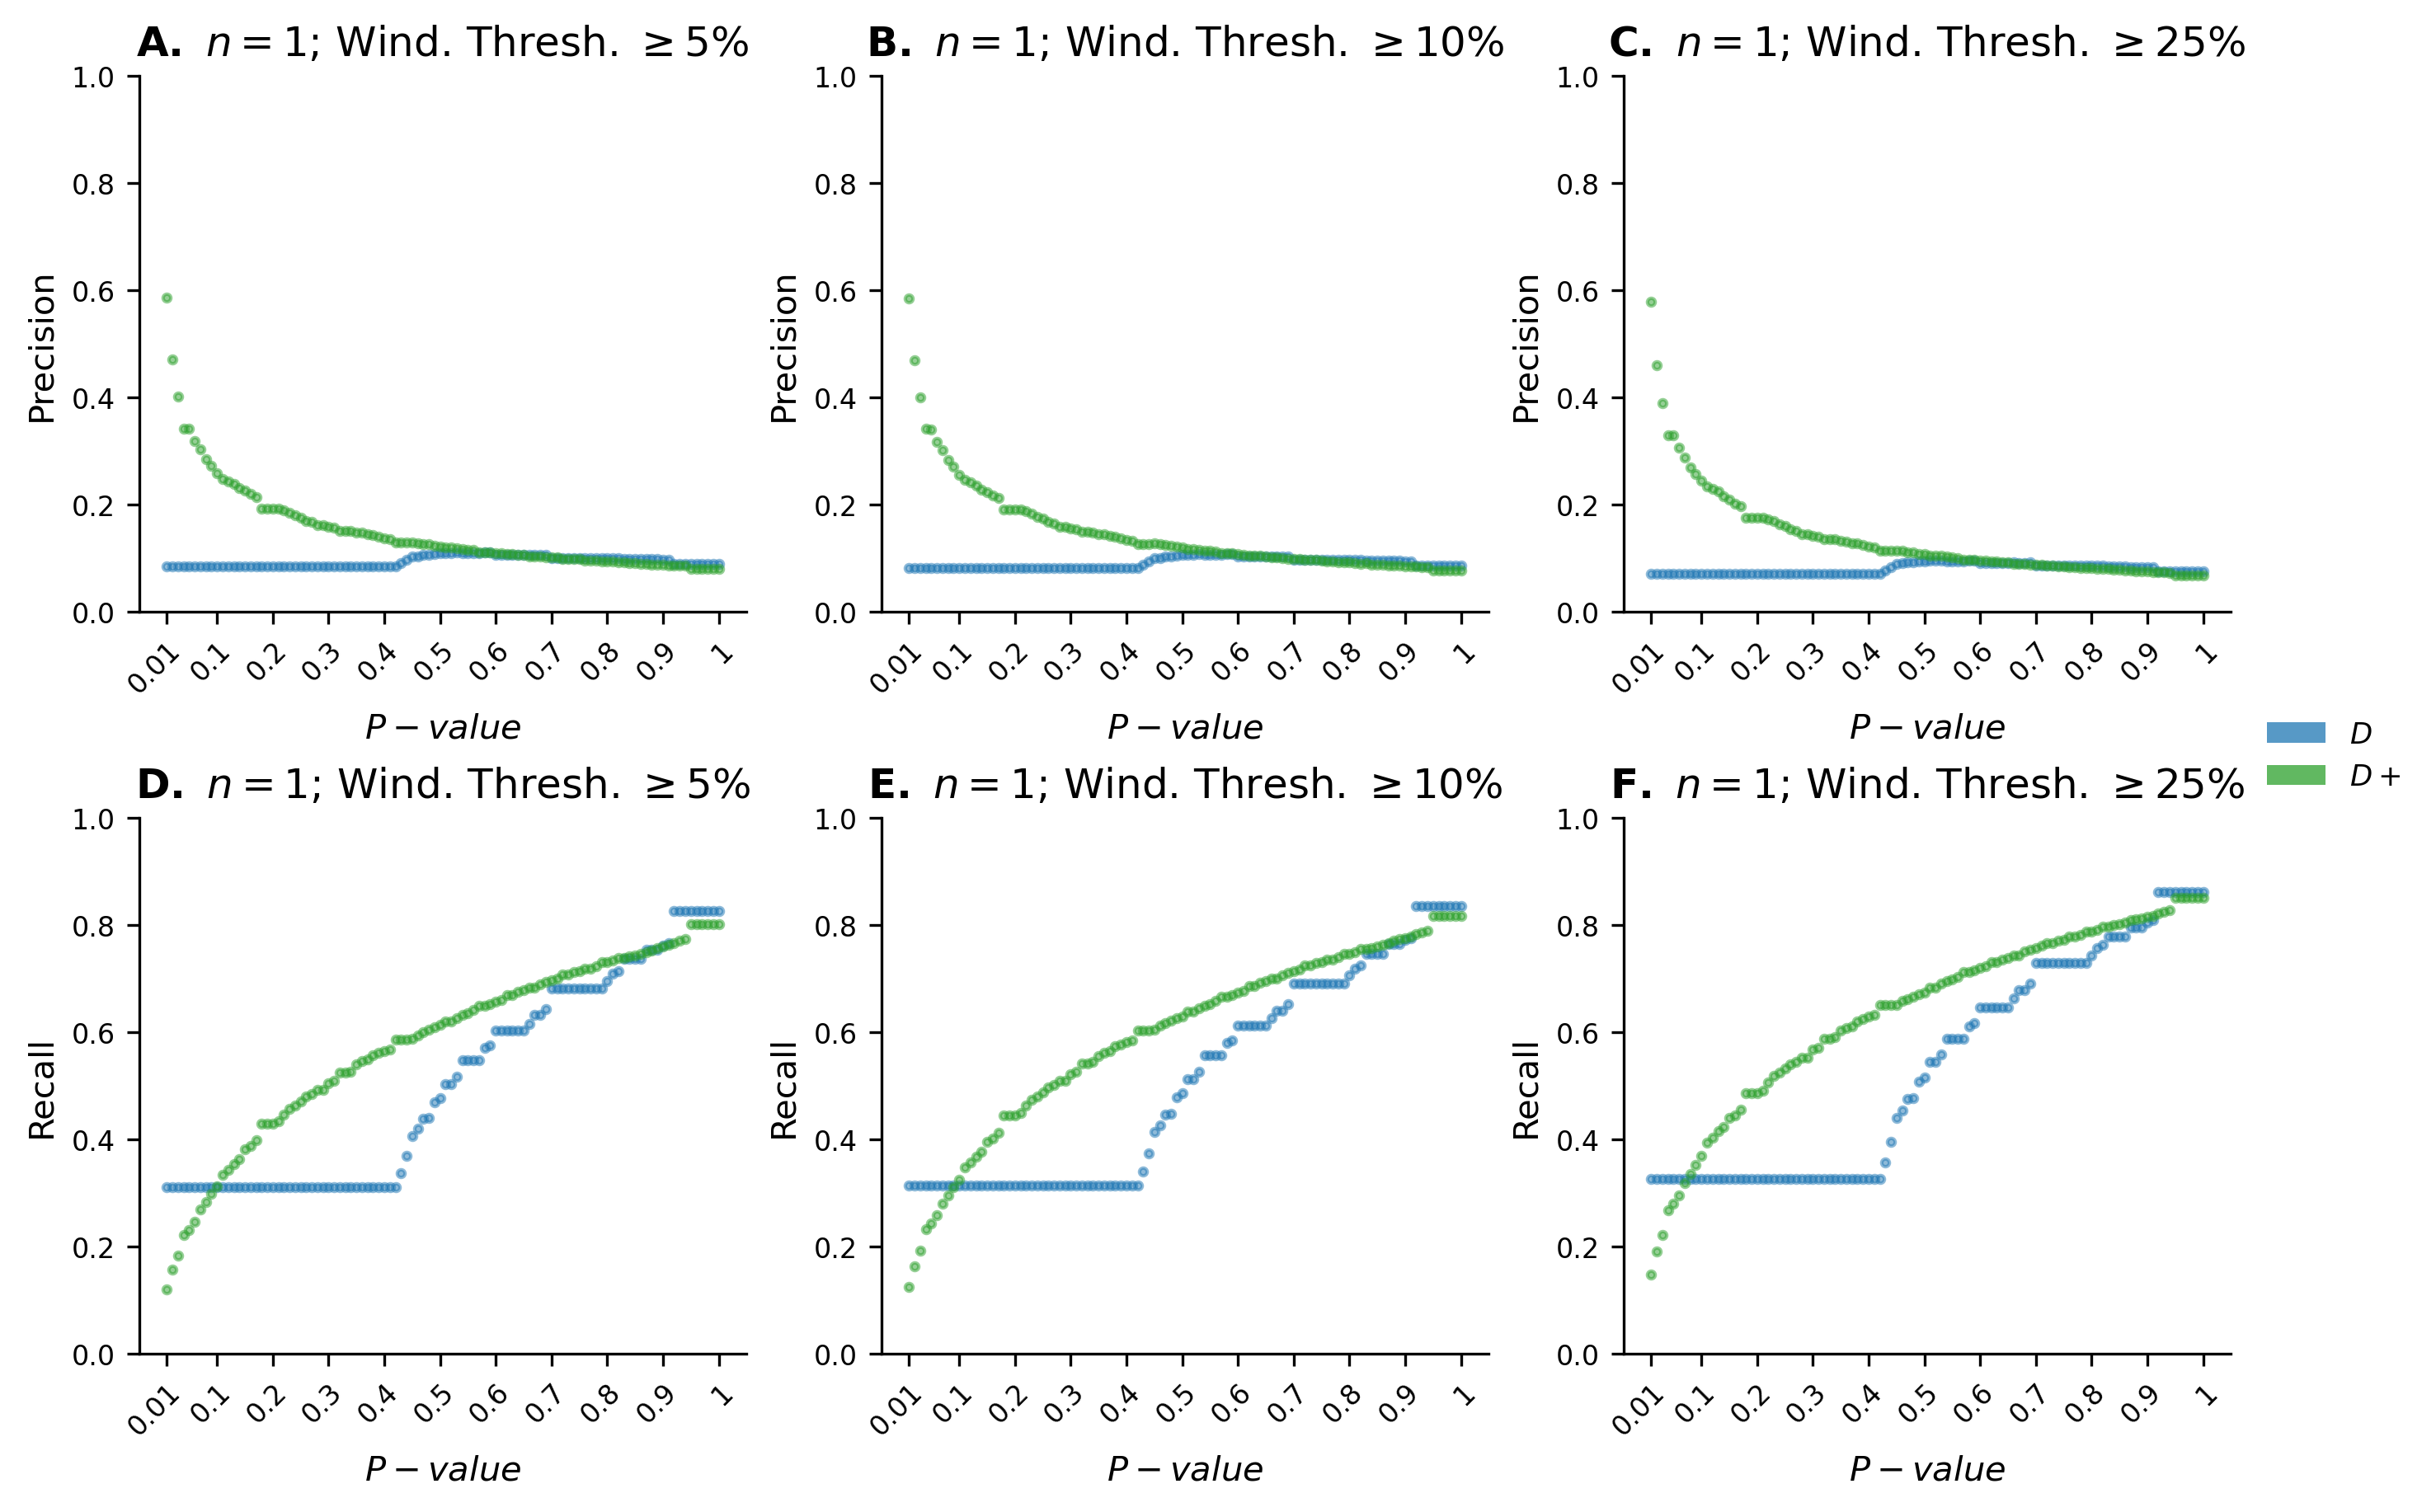

In [26]:
# Intialize the figure.
fig, axes = plt.subplots(
    2, 3, figsize=(9, 6), dpi=300.0,
    sharex=False, sharey=False, facecolor='white',
)
# Intialize the x-axis values.
xs = np.arange(0.01, 1.01, 0.01)
x_ticks = np.array([
    0.01, 0.1 , 0.2 , 0.3 ,
    0.4 , 0.5 , 0.6 , 0.7 ,
    0.8 , 0.9 , 1,
])
# Intialize a title.
title = r'$n = 1$'
# Intialize a window threshold suffix list.
n1_suffix_list = [
    r'; Wind. Thresh. $\geq 5\%$',
    r'; Wind. Thresh. $\geq 10\%$',
    r'; Wind. Thresh. $\geq 25\%$',
]
# Intialize the first letter ASCII value.
c_letter = 65
# Intialzie the sample size and chromosome threshold conditions.
cond_n = performance_df['n'] == 1
cond_chrom = performance_df['chrom_thresh'] == 1
# For every window threshold.
for i, wind_thresh in enumerate([0.05, 0.1, 0.25]):
    # Intialize the window threshold and test statistic conditions.
    cond_wind = performance_df['wind_thresh'] == wind_thresh
    cond_d = performance_df['stat'] == 'D'
    cond_dplus = performance_df['stat'] == 'D+'
    # Plot the percision results.
    axes[0, i].scatter(
        xs, performance_df[cond_n & cond_chrom & cond_wind & cond_d]['precision'].values,
        marker='o', s=5, color='tab:blue', alpha=0.5,
    )
    axes[0, i].scatter(
        xs, performance_df[cond_n & cond_chrom & cond_wind & cond_dplus]['precision'].values,
        marker='o', s=5, color='tab:green', alpha=0.5,
    )
    # Plot the recall results/
    axes[1, i].scatter(
        xs, performance_df[cond_n & cond_chrom & cond_wind & cond_d]['recall'].values,
        marker='o', s=5, color='tab:blue', alpha=0.5,
    )
    axes[1, i].scatter(
        xs, performance_df[cond_n & cond_chrom & cond_wind & cond_dplus]['recall'].values,
        marker='o', s=5, color='tab:green', alpha=0.5,
    )
    # Label the y-axes.
    axes[0, i].set_ylabel('Precision')
    axes[1, i].set_ylabel('Recall')
    # Set the y-axes limits.
    axes[0, i].set_ylim(0, 1)
    axes[1, i].set_ylim(0, 1)
# For every row.
for i in range(2):
    # For every column.
    for j in range(3):
        # Set the x-axis ticks and tick labels.
        axes[i, j].set_xticks(x_ticks)
        axes[i, j].set_xticklabels(
            [str(int(x)) if x.is_integer() else str(x) for x in x_ticks],
            rotation=45, ha='right', rotation_mode='anchor',
        )
        # Set the x-axis label for each subplot.
        axes[i, j].set_xlabel(r'$P-value$')
        # Set the title of the subplot.
        axes[i, j].set_title(r'$\bf{'+chr(c_letter)+'.}$ '+title+n1_suffix_list[j])
        # Move the letter counter forward.
        c_letter += 1
# Configure the legend.
legend_elements = [
    Patch(facecolor='tab:blue', alpha=0.75, label=r'$D$'),
    Patch(facecolor='tab:green', alpha=0.75, label=r'$D+$'),
]
# Add a figure lgend.
fig.legend(
    handles=legend_elements, loc='center left',
    bbox_to_anchor=(1.0, 0.5), frameon=False,
    fontsize=8.5,
)
# Show the plot.
plt.show()

> 2. In response to 5c, as the archaic introgression proportion of human populations is very low, I believe the authors should demonstrate the simulation results of a proportion less than 10%. In particular, in case “f<10% will lead to very little within a window”, could the authors choose a more appropriate threshold to determine the introgressed window under this circumstance?

The reviewer brings up a reasonable point that for simulations where we sample 200 chromosomes from P1 (representing 100 African individuals), 200 chromosomes from P2 (representing 100 Eurasian individuals), and 2 chromosomes from P3 (representing 1 Neanderthal individual) we did not originally simulate an admixture proportion that reflects a proportion of introgression from Neanderthals similar to current gene flow estimates (Green et al. 2010). To address the reviewer's concerns about the performance of D and D+ using derived allele frequencies, we re-ran simulations using the demographic model described in Figure 2 with the aforementioned sampling scheme. Anticipating the reviewer being interested in the behavior of D/D+’s performance conditioned on different thresholds, we computed precision and recall for all pairwise combinations of chromosome thresholds—i.e., introgressed tracts being present in at least 5%, 10%, and 25% of sampled P2 chromosomes—and window thresholds—i.e., introgressed tracts covering at least 5%, 10%, and 25% of a 50kb window.

The first figure shows the results for precision, and demonstrates that 1) the chromosome threshold has a larger impact on precision than the window threshold and 2) for realistic P-values D+ will always have a higher precision than D. The second figure shows the results for recall, and demonstrates, again, that 1) the chromosome threshold has a larger impact on recall than the window threshold and 2) for realistic P-values D+ will always have a higher recall than D. It should be noted that unlike the simulations where we sample one chromosome from P1, P2, and P3, sampling more chromosomes results in D+ having a higher recall than D, due to the true positive rate always being larger for D+ than D.

Taken together, much like our results for simulations sampling only one chromosome, our latest results further demonstrate that for a realistic admixture proportion, increased number of sampled chromosomes, and for all pairwise possibilities of chromosome and window thresholds D+ consistently outperforms D for detecting signals of introgression at a local scale.

In [27]:
# Compile the results for the second response.
cond_n = performance_df['n'] == 100
cond_p = performance_df['pval'] == 0.05
performance_df[cond_n & cond_p]

,n,chrom_thresh,wind_thresh,pval,stat,tp,tn,fp,fn,precision,recall
612,100,0.05,0.05,0.05,D,692,24651,687,13329,0.501813,0.049355
613,100,0.05,0.10,0.05,D,682,24651,687,12802,0.498174,0.050578
614,100,0.05,0.25,0.05,D,630,24651,687,11287,0.478360,0.052866
912,100,0.05,0.05,0.05,D+,896,24705,681,13125,0.568167,0.063904
913,100,0.05,0.10,0.05,D+,876,24705,681,12608,0.562620,0.064966
914,100,0.05,0.25,0.05,D+,822,24705,681,11095,0.546906,0.068977
1212,100,0.10,0.05,0.05,D,436,31727,952,6411,0.314121,0.063678
1213,100,0.10,0.10,0.05,D,416,31727,952,6012,0.304094,0.064717
1214,100,0.10,0.25,0.05,D,377,31727,952,4982,0.283672,0.070349
1512,100,0.10,0.05,0.05,D+,594,31754,973,6253,0.379068,0.086753


In [28]:
# Look at the total number of truly introgressed windows per thresholds.
for key_c in wind_intro_info[100]:
    for key_w in wind_intro_info[100][key_c]:
        n_winds = wind_intro_info[100][key_c][key_w]['n'].sum()
        print(f'chromosome threshold: {key_c}; window threshold: {key_w}; introgressed windows: {n_winds}')

chromosome threshold: 0.05; window threshold: 0.05; introgressed windows: 14021.0
chromosome threshold: 0.05; window threshold: 0.1; introgressed windows: 13484.0
chromosome threshold: 0.05; window threshold: 0.25; introgressed windows: 11917.0
chromosome threshold: 0.1; window threshold: 0.05; introgressed windows: 6847.0
chromosome threshold: 0.1; window threshold: 0.1; introgressed windows: 6428.0
chromosome threshold: 0.1; window threshold: 0.25; introgressed windows: 5359.0
chromosome threshold: 0.25; window threshold: 0.05; introgressed windows: 455.0
chromosome threshold: 0.25; window threshold: 0.1; introgressed windows: 396.0
chromosome threshold: 0.25; window threshold: 0.25; introgressed windows: 257.0


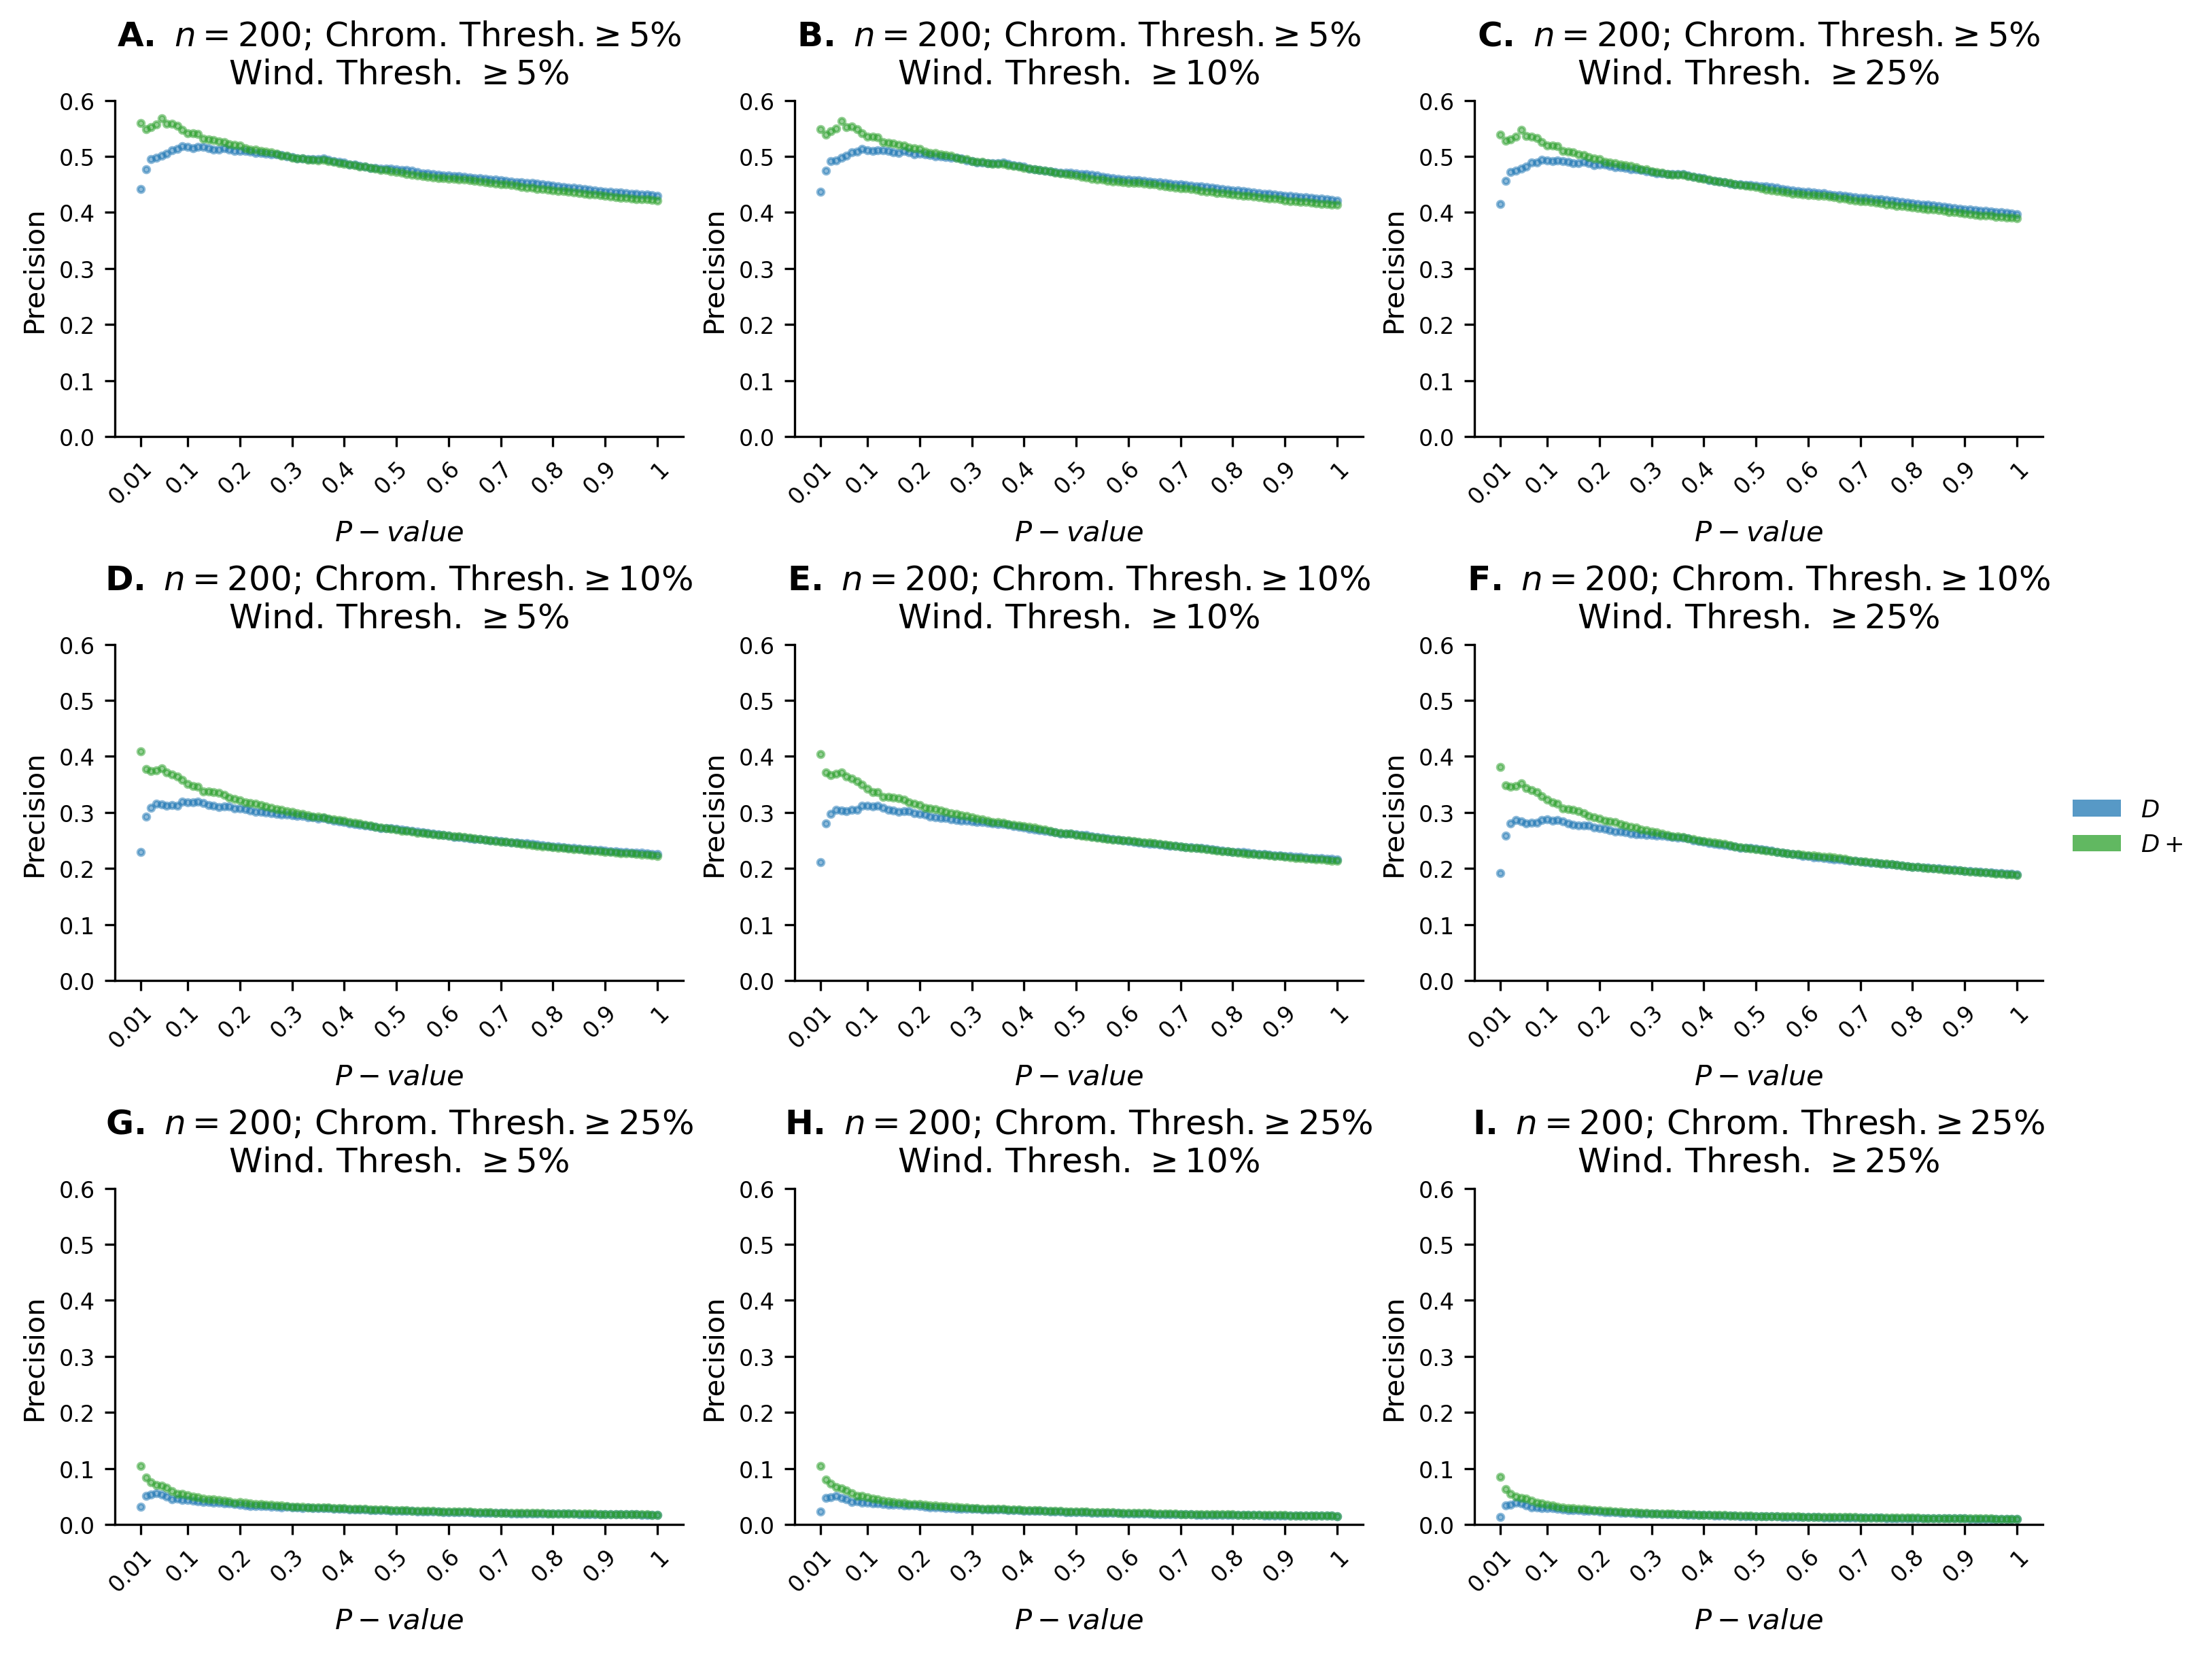

In [29]:
# Intialize the figure.
fig, axes = plt.subplots(
    3, 3, figsize=(10, 8), dpi=300.0,
    sharex=False, sharey=False, facecolor='white',
)
# Intialize the x-axis values.
xs = np.arange(0.01, 1.01, 0.01)
x_ticks = np.array([
    0.01, 0.1 , 0.2 , 0.3 ,
    0.4 , 0.5 , 0.6 , 0.7 ,
    0.8 , 0.9 , 1,
])
# Intialize a plotting dictionary.
plot_dicc = {
    (100, 0.05): r'$n = 200$; Chrom. Thresh.$\geq 5\%$',
    (100, 0.1): r'$n = 200$; Chrom. Thresh.$\geq 10\%$',
    (100, 0.25): r'$n = 200$; Chrom. Thresh.$\geq 25\%$',
}
# Intialize a window threshold suffix list.
n100_suffix_list = [
    '\n'+r'Wind. Thresh. $\geq 5\%$',
    '\n'+r'Wind. Thresh. $\geq 10\%$',
    '\n'+r'Wind. Thresh. $\geq 25\%$',
]
# Intialize the first letter ASCII value.
c_letter = 65
# For every set of values.
for i, vals in enumerate(plot_dicc):
    # Extract the values.
    n, chrom_thresh = vals
    # Intialzie the sample size and chromosome threshold conditions.
    cond_n = performance_df['n'] == n
    cond_chrom = performance_df['chrom_thresh'] == chrom_thresh
    # For every window threshold.
    for j, wind_thresh in enumerate([0.05, 0.1, 0.25]):
        # Intialize the window threshold and test statistic conditions.
        cond_wind = performance_df['wind_thresh'] == wind_thresh
        cond_d = performance_df['stat'] == 'D'
        cond_dplus = performance_df['stat'] == 'D+'
        # Plot the percision results.
        axes[i, j].scatter(
            xs, performance_df[cond_n & cond_chrom & cond_wind & cond_d]['precision'].values,
            marker='o', s=5, color='tab:blue', alpha=0.5,
        )
        axes[i, j].scatter(
            xs, performance_df[cond_n & cond_chrom & cond_wind & cond_dplus]['precision'].values,
            marker='o', s=5, color='tab:green', alpha=0.5,
        )
        # Set the x-axis ticks and tick labels.
        axes[i, j].set_xticks(x_ticks)
        axes[i, j].set_xticklabels(
            [str(int(x)) if x.is_integer() else str(x) for x in x_ticks],
            rotation=45, ha='right', rotation_mode='anchor',
        )
        # Set the axes labels for each subplot.
        axes[i, j].set_ylabel('Precision')
        axes[i, j].set_xlabel(r'$P-value$')
        # Set the y-axes limits.
        axes[i, j].set_ylim(0, 0.6)
        # Set the title of the subplot.
        axes[i, j].set_title(r'$\bf{'+chr(c_letter)+'.}$ '+plot_dicc[vals]+n100_suffix_list[j])
        # Move the letter counter forward.
        c_letter += 1
# Configure the legend.
legend_elements = [
    Patch(facecolor='tab:blue', alpha=0.75, label=r'$D$'),
    Patch(facecolor='tab:green', alpha=0.75, label=r'$D+$'),
]
# Add a figure lgend.
fig.legend(
    handles=legend_elements, loc='center left',
    bbox_to_anchor=(1.0, 0.5), frameon=False,
    fontsize=8.5,
)
# Show the plot.
plt.show()

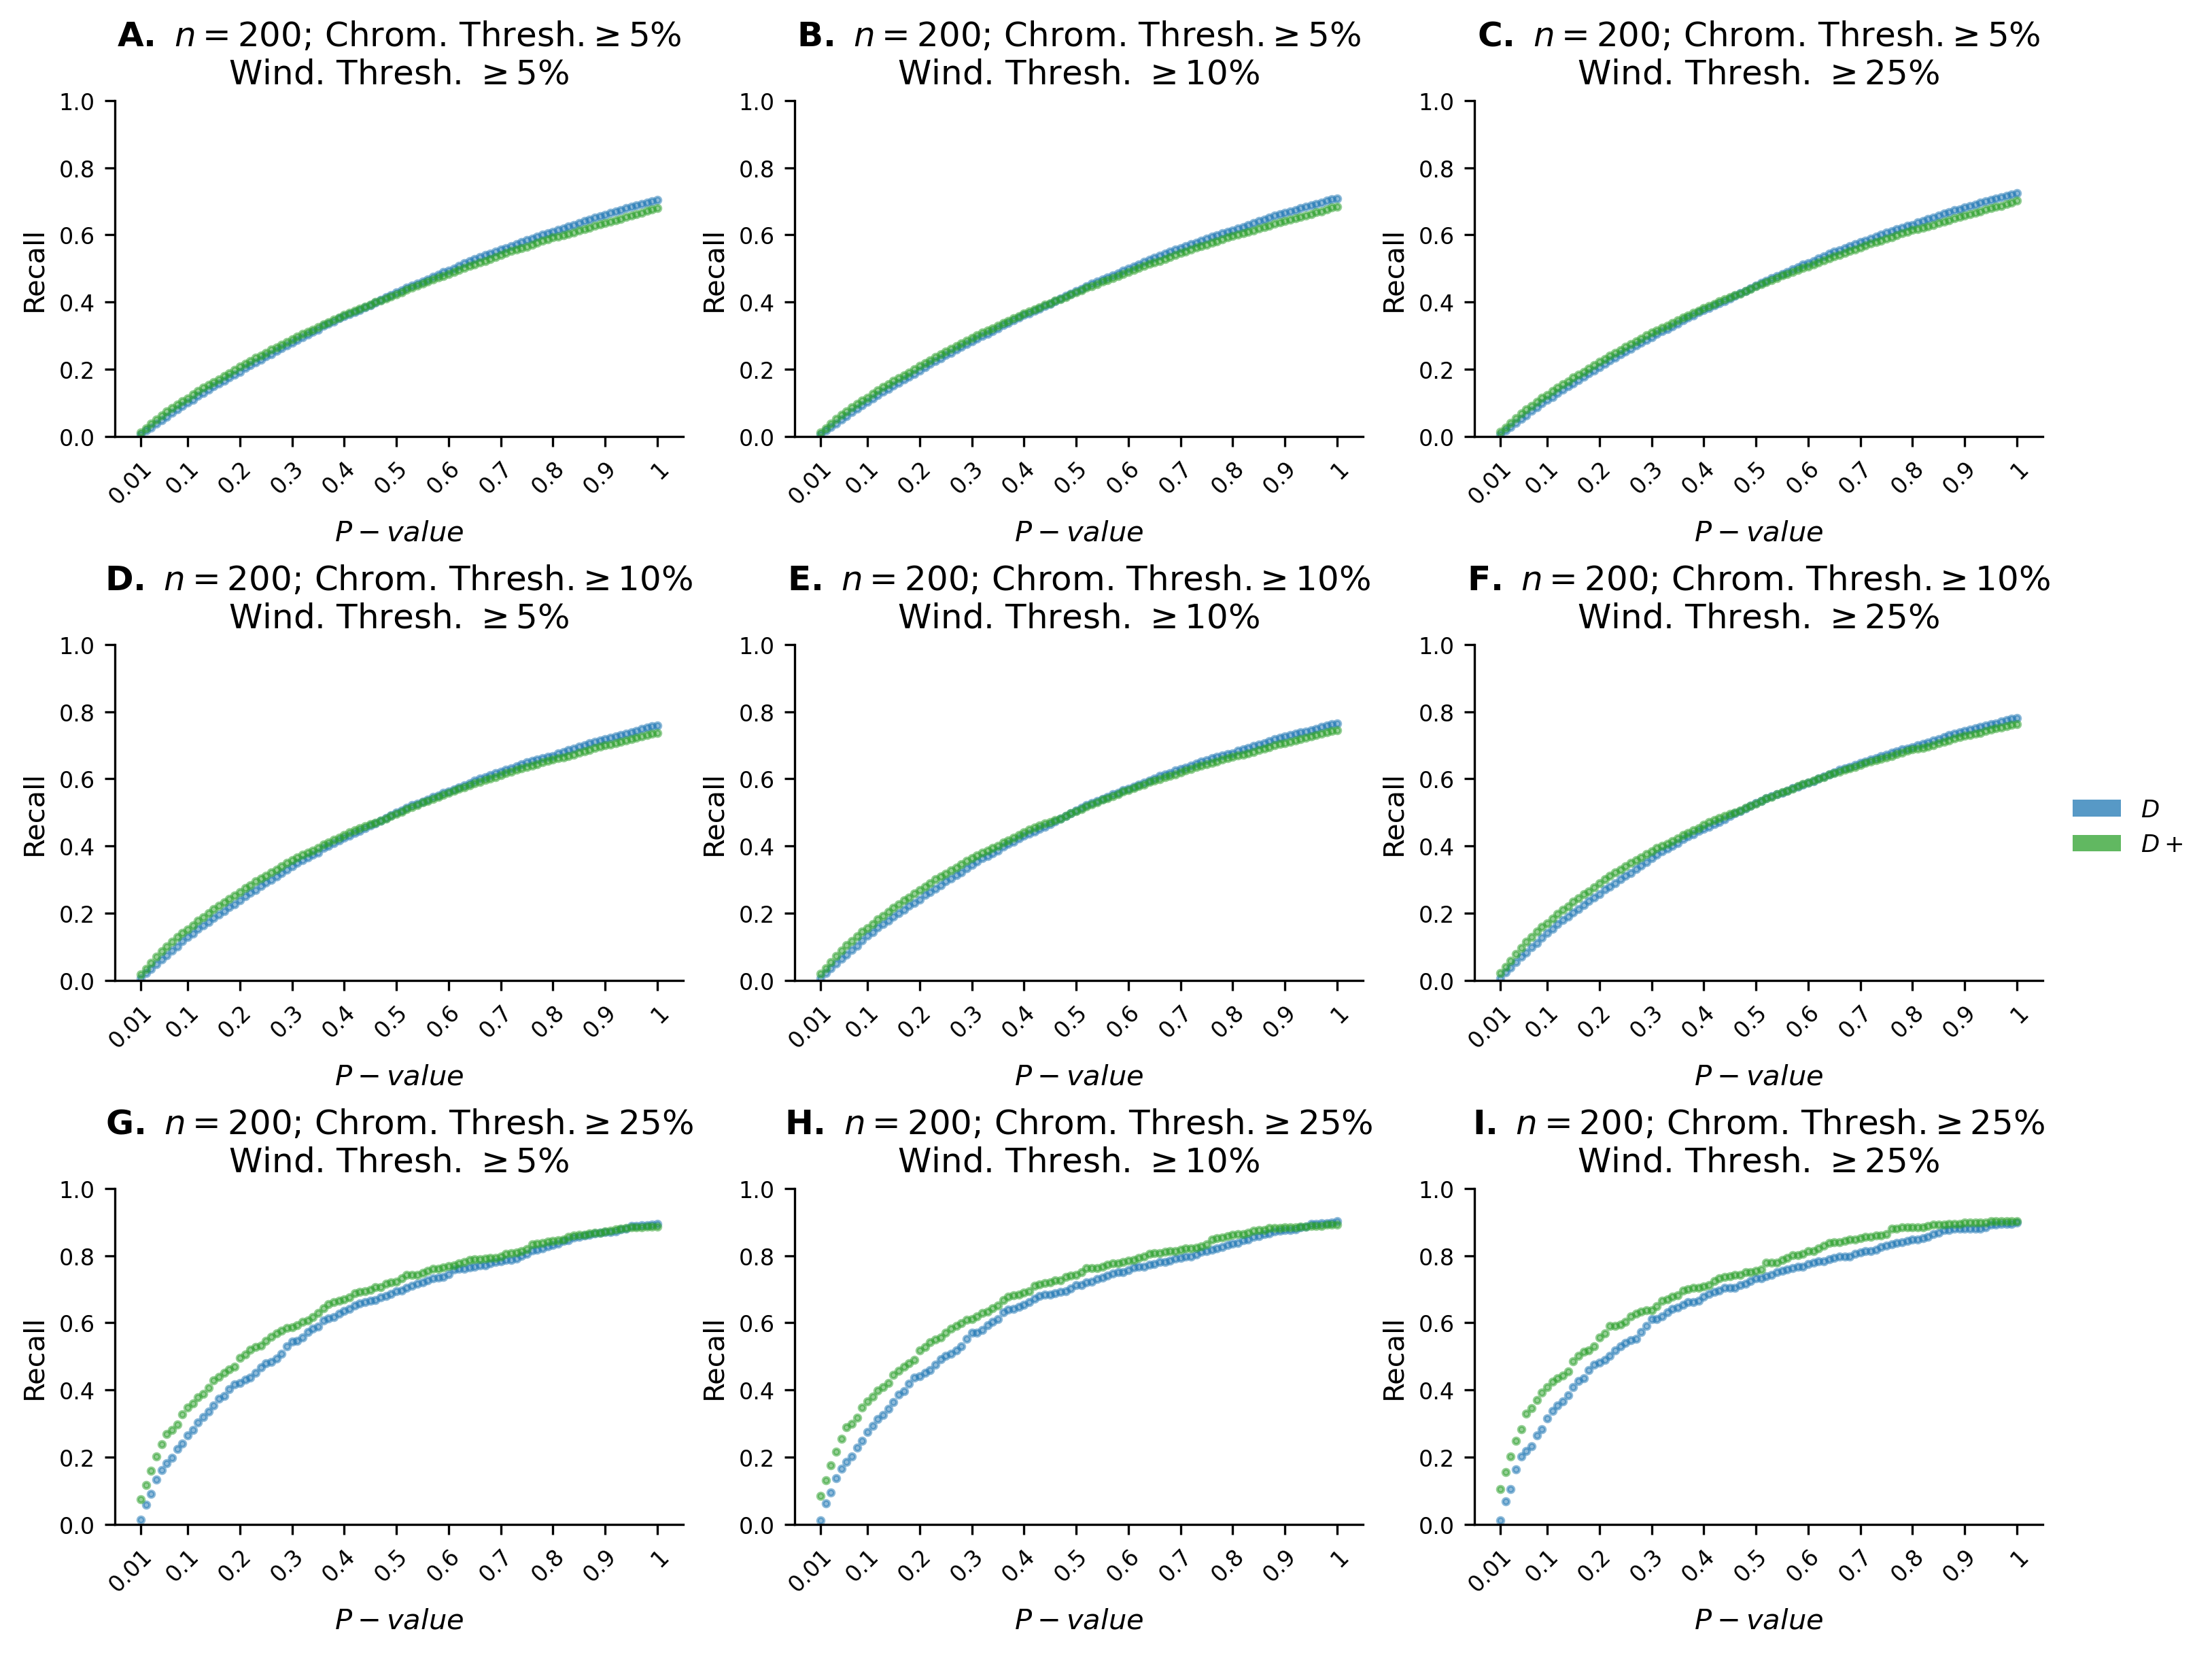

In [30]:
# Intialize the figure.
fig, axes = plt.subplots(
    3, 3, figsize=(10, 8), dpi=300.0,
    sharex=False, sharey=False, facecolor='white',
)
# Intialize the x-axis values.
xs = np.arange(0.01, 1.01, 0.01)
x_ticks = np.array([
    0.01, 0.1 , 0.2 , 0.3 ,
    0.4 , 0.5 , 0.6 , 0.7 ,
    0.8 , 0.9 , 1,
])
# Intialize a plotting dictionary.
plot_dicc = {
    (100, 0.05): r'$n = 200$; Chrom. Thresh.$\geq 5\%$',
    (100, 0.1): r'$n = 200$; Chrom. Thresh.$\geq 10\%$',
    (100, 0.25): r'$n = 200$; Chrom. Thresh.$\geq 25\%$',
}
# Intialize a window threshold suffix list.
n100_suffix_list = [
    '\n'+r'Wind. Thresh. $\geq 5\%$',
    '\n'+r'Wind. Thresh. $\geq 10\%$',
    '\n'+r'Wind. Thresh. $\geq 25\%$',
]
# Intialize the first letter ASCII value.
c_letter = 65
# For every set of values.
for i, vals in enumerate(plot_dicc):
    # Extract the values.
    n, chrom_thresh = vals
    # Intialzie the sample size and chromosome threshold conditions.
    cond_n = performance_df['n'] == n
    cond_chrom = performance_df['chrom_thresh'] == chrom_thresh
    # For every window threshold.
    for j, wind_thresh in enumerate([0.05, 0.1, 0.25]):
        # Intialize the window threshold and test statistic conditions.
        cond_wind = performance_df['wind_thresh'] == wind_thresh
        cond_d = performance_df['stat'] == 'D'
        cond_dplus = performance_df['stat'] == 'D+'
        # Plot the recall results.
        axes[i, j].scatter(
            xs, performance_df[cond_n & cond_chrom & cond_wind & cond_d]['recall'].values,
            marker='o', s=5, color='tab:blue', alpha=0.5,
        )
        axes[i, j].scatter(
            xs, performance_df[cond_n & cond_chrom & cond_wind & cond_dplus]['recall'].values,
            marker='o', s=5, color='tab:green', alpha=0.5,
        )
        # Set the x-axis ticks and tick labels.
        axes[i, j].set_xticks(x_ticks)
        axes[i, j].set_xticklabels(
            [str(int(x)) if x.is_integer() else str(x) for x in x_ticks],
            rotation=45, ha='right', rotation_mode='anchor',
        )
        # Set the axes labels for each subplot.
        axes[i, j].set_ylabel('Recall')
        axes[i, j].set_xlabel(r'$P-value$')
        # Set the y-axes limits.
        axes[i, j].set_ylim(0, 1)
        # Set the title of the subplot.
        axes[i, j].set_title(r'$\bf{'+chr(c_letter)+'.}$ '+plot_dicc[vals]+n100_suffix_list[j])
        # Move the letter counter forward.
        c_letter += 1
# Configure the legend.
legend_elements = [
    Patch(facecolor='tab:blue', alpha=0.75, label=r'$D$'),
    Patch(facecolor='tab:green', alpha=0.75, label=r'$D+$'),
]
# Add a figure lgend.
fig.legend(
    handles=legend_elements, loc='center left',
    bbox_to_anchor=(1.0, 0.5), frameon=False,
    fontsize=8.5,
)
# Show the plot.
plt.show()